In [25]:
from model import SqueezeModel, SqueezeModel2

In [27]:
from keras.layers import Input
from keras.models import Model

In [29]:
model_input = Input(shape=(12, 12, 12, 16))
squeeze_model = Model(inputs=model_input, outputs=SqueezeModel(model_input))

In [30]:
squeeze_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 12, 12, 12, 1 0                                            
__________________________________________________________________________________________________
conv1 (Conv3D)                  (None, 12, 12, 12, 9 1632        input_1[0][0]                    
__________________________________________________________________________________________________
fire2_squeeze (Conv3D)          (None, 12, 12, 12, 1 1552        conv1[0][0]                      
__________________________________________________________________________________________________
fire2_expand1 (Conv3D)          (None, 12, 12, 12, 6 1088        fire2_squeeze[0][0]              
__________________________________________________________________________________________________
fire2_expa

In [1]:
from glob import glob
import matplotlib.pyplot as plt
import os
import re
%matplotlib inline

In [2]:
def plot(t, data1, data2):
    fig, ax1 = plt.subplots(figsize=(10, 5))
    color = 'tab:red'
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('R', color=color)
    ax1.plot(t, data1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('RMSE', color=color)  # we already handled the x-label with ax1
    ax2.plot(t, data2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

In [6]:
def extract_data(files):
    results = []
    for _f in files:
        iteration_count = int(os.path.split(_f)[0].split('_')[1])
        with open(_f, 'r') as f:
            content = [i.split('\n')[0] for i in f.readlines()][-1]
            temp_results = [float(s) for s in re.findall("\d+\.\d+", content)]
            temp_result = (iteration_count, temp_results)
            results.append(temp_result)
    results.sort()
    epochs = [i[0] for i in results]
    R = [i[1][0] for i in results]
    RMSE = [i[1][1] for i in results]
    return [epochs, R, RMSE]

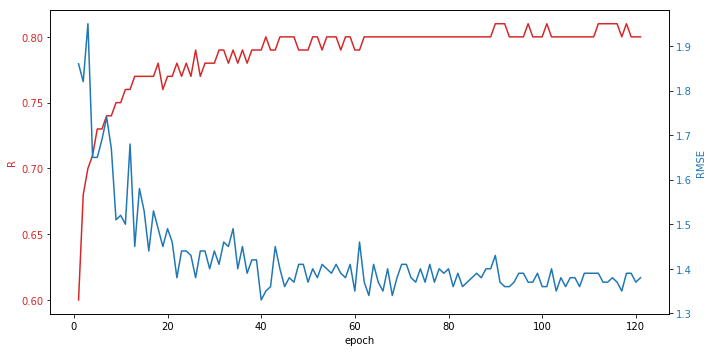

In [24]:
files = sorted(glob("continuous training/*/log.txt"))
plot(*extract_data(files))

#### Choosing the best weights

In [8]:
e, r, rmse = extract_data(files)

In [23]:
start, end = 85, 100
for i, (a, b) in enumerate(zip(r[start:end], rmse[start:end])):
    print(str(start+i), a, b)

85 0.8 1.39
86 0.8 1.38
87 0.8 1.4
88 0.8 1.4
89 0.81 1.43
90 0.81 1.37
91 0.81 1.36
92 0.8 1.36
93 0.8 1.37
94 0.8 1.39
95 0.8 1.39
96 0.81 1.37
97 0.8 1.37
98 0.8 1.39
99 0.8 1.36


Looks like #91 is the best

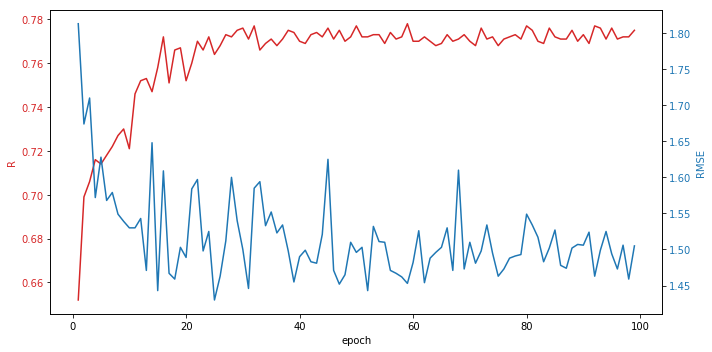

In [5]:
files = sorted(glob("continuous training batch norm/*/log.txt"))
plot(*extract_data(files))